<b> In this notebook i computed the frequency of each theme in all of the south pacific. I also started looking at the 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)

###### This query is all three of the tables (Events, Eventmention, GKG) combined

SELECT 
  events.GLOBALEVENTID, SQLDATE, MonthYear, Actor1Name, Actor1CountryCode, Actor2Name, Actor2CountryCode, EventCode, GoldsteinScale, NumMentions, NumSources, NumArticles, AvgTone, Actor1Geo_FullName, Actor1Geo_CountryCode, Actor2Geo_FullName, Actor2Geo_CountryCode, ActionGeo_FullName, ActionGeo_CountryCode, ActionGeo_ADM1Code, ActionGeo_ADM2Code, SOURCEURL, MentionTimeDate, MentionType, MentionSourceName, MentionIdentifier, SentenceID, Actor1CharOffset, Actor2CharOffset, ActionCharOffset, InRawText, Confidence,	MentionDocLen, MentionDocTone, SourceCollectionIdentifier, SourceCommonName, DocumentIdentifier, V2Themes, Persons, Organizations, V2Tone
FROM 
  `gdelt-bq.gdeltv2.eventmentions` as eventmentions join `gdelt-bq.gdeltv2.events` as events 
    ON eventmentions.GLOBALEVENTID = events.GLOBALEVENTID inner join `gdelt-bq.gdeltv2.gkg`as GKG on eventmentions.MentionIdentifier = GKG.DocumentIdentifier
WHERE 
  ActionGeo_ADM1Code like 'FM%' -- Micronesia
  OR ActionGeo_ADM1Code like 'FJ%' -- Fiji
  OR ActionGeo_ADM1Code like 'KR%' -- Kiribati
  OR ActionGeo_ADM1Code like 'RM%' -- Marshall Islands
  OR ActionGeo_ADM1Code like 'NR%' -- Nauru
  OR ActionGeo_ADM1Code like 'PS%' -- Palau
  OR ActionGeo_ADM1Code like 'PP%' -- Papua New Guinea
  OR ActionGeo_ADM1Code like 'WS%' -- Samoa
  OR ActionGeo_ADM1Code like 'BP%' -- Solomon Islands
  OR ActionGeo_ADM1Code like 'TN%' -- Tonga
  OR ActionGeo_ADM1Code like 'TV%' -- Tuvalu
  OR ActionGeo_ADM1Code like 'NH%' -- Vanuatu
  OR ActionGeo_ADM1Code like 'CW%' -- Cook Islands
  OR ActionGeo_ADM1Code like 'NE%' -- Niue
  OR ActionGeo_ADM1Code like 'AQ%' -- American Samoa
  OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
  OR ActionGeo_ADM1Code like 'FQ%' -- Baker Island
  OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
  OR ActionGeo_FullName like 'Easter Island, V%'
  OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
  OR ActionGeo_ADM1Code like 'FP%' -- French Polynesia
  OR ActionGeo_ADM1Code like 'GQ%' -- Guam
  OR ActionGeo_ADM1Code like 'HQ%' -- Howland Island
  OR ActionGeo_ADM1Code like 'DQ%' -- Jarvis Island
  OR ActionGeo_ADM1Code like 'JQ%' -- Johnston Atoll
  OR ActionGeo_ADM1Code like 'KQ%' -- Kingman Reef
  OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
  OR ActionGeo_ADM1Code like 'NC%' -- New Caledonia
  OR ActionGeo_ADM1Code like 'NF%' -- Norfold Island
  OR ActionGeo_ADM1Code like 'CQ%' -- Norther Mariana Islands
  OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
  OR ActionGeo_ADM1Code like 'LQ%' -- Palmyra Atoll
  OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
  OR ActionGeo_ADM1Code like 'PC%' -- Pitcairn Islands
  OR ActionGeo_ADM1Code like 'TL%' -- Tokelau
  OR ActionGeo_ADM1Code like 'WQ%' -- Wake Island
  OR ActionGeo_ADM1Code like 'WF%' -- Wallis and Futuna
  OR ActionGeo_ADM1Code = 'ID39' -- West Papua, Indonesia
  OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan'

In [2]:
# Read in the data
df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/Python Programming/events_eventmentions_gkg.csv')

In [3]:
df = df.convert_dtypes()

In [4]:
# Create the SQL engine 
engine = create_engine('sqlite://', echo=False)
df.to_sql('events_eventmentions_gkg', con=engine)

In [5]:
df.head(10)

GLOBALEVENTID   SQLDATE  MonthYear      Actor1Name Actor1CountryCode  \
0      610689060  20161221     201612            <NA>              <NA>   
1      678214333  20170803     201708      WORLD BANK              <NA>   
2      923901470  20200516     202005            KING              <NA>   
3      657357859  20170520     201705            <NA>              <NA>   
4      497398390  20151227     201512  UNITED NATIONS              <NA>   
5      734147745  20180226     201802         COMPANY              <NA>   
6      934915583  20200714     202007            <NA>              <NA>   
7      713700244  20171209     201712          TONGAN               TON   
8      520463425  20160312     201603        DELEGATE              <NA>   
9      872945801  20190916     201909           TONGA               TON   

  Actor2Name Actor2CountryCode  EventCode  GoldsteinScale  NumMentions  \
0    VILLAGE              <NA>         17             0.0            1   
1       <NA>              <NA>         60             6.0           10   
2      TONGA               TON         20             3.0           10   
3     MURRAY               AUS         43             2.8            3   
4       <NA>              <NA>         40             1.0            8   
5   EMPLOYEE              <NA>         12            -0.4            1   
6       NIUE               NZL         42             1.9           12   
7    KINGDOM              <NA>        100            -5.0            2   
8       <NA>              <NA>         42             1.9            8   
9       <NA>              <NA>         60             6.0           10   

   NumSources  NumArticles   AvgTone                  Actor1Geo_FullName  \
0           1            1  0.609756                                <NA>   
1           1           10 -5.844156              Haapai, Ha‘apai, Tonga   
2           1           10  1.359833              Haapai, Ha‘apai, Tonga   
3           1            3  5.078125                                <NA>   
4           1            8 -1.536936  Bali, East Sepik, Papua New Guinea   
5           1            1 -4.589844  Ok Tedi, Western, Papua New Guinea   
6           1            6 -0.446429                                <NA>   
7           1            2 -0.740741                Vavau, Vava‘u, Tonga   
8           4            8 -3.434767     Cincinnati, Ohio, United States   
9           1           10  1.639344         Tongatapu, Tongatapu, Tonga   

  Actor1Geo_CountryCode                  Actor2Geo_FullName  \
0                  <NA>     Haatafu Beach, Tongatapu, Tonga   
1                    TN                                <NA>   
2                    TN              Haapai, Ha‘apai, Tonga   
3                  <NA>       Adamstown, , Pitcairn Islands   
4                    PP                                <NA>   
5                    PP  Ok Tedi, Western, Papua New Guinea   
6                  <NA>                                Niue   
7                    TN                               China   
8                    US                                <NA>   
9                    TN                                <NA>   

  Actor2Geo_CountryCode                  ActionGeo_FullName  \
0                    TN     Haatafu Beach, Tongatapu, Tonga   
1                  <NA>              Haapai, Ha‘apai, Tonga   
2                    TN              Haapai, Ha‘apai, Tonga   
3                    PC       Adamstown, , Pitcairn Islands   
4                  <NA>  Bali, East Sepik, Papua New Guinea   
5                    PP  Ok Tedi, Western, Papua New Guinea   
6                    NE                                Niue   
7                    CH                Vavau, Vava‘u, Tonga   
8                  <NA>            Northern Mariana Islands   
9                  <NA>         Tongatapu, Tongatapu, Tonga   

  ActionGeo_CountryCode ActionGeo_ADM1Code  ActionGeo_ADM2Code  \
0                    TN               TN02               27407   
1    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320359 entries, 0 to 4320358
Data columns (total 41 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   GLOBALEVENTID               Int64  
 1   SQLDATE                     Int64  
 2   MonthYear                   Int64  
 3   Actor1Name                  string 
 4   Actor1CountryCode           string 
 5   Actor2Name                  string 
 6   Actor2CountryCode           string 
 7   EventCode                   Int64  
 8   GoldsteinScale              float64
 9   NumMentions                 Int64  
 10  NumSources                  Int64  
 11  NumArticles                 Int64  
 12  AvgTone                     float64
 13  Actor1Geo_FullName          string 
 14  Actor1Geo_CountryCode       string 
 15  Actor2Geo_FullName          string 
 16  Actor2Geo_CountryCode       string 
 17  ActionGeo_FullName          string 
 18  ActionGeo_CountryCode       string 
 19  ActionGeo_ADM1Code   

### Average V2Tone for each news source

In [7]:
query = """
SELECT SourceCommonName, AVG(V2Tone) as Tone
FROM events_eventmentions_gkg
GROUP BY SourceCommonName
ORDER BY Tone DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['SourceCommonName','Tone'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,SourceCommonName,Tone
0,uptv.com,16.666667
1,akher.news,16.239316
2,worldathletics.org,12.500000
3,wolx.com,12.500000
4,iaaf.org,12.500000
5,nt.am,12.352941
6,3yonnews.com,11.868607
7,scenichotelgroup.co.nz,11.598739
8,aravot.am,11.475410
9,tet.tv,11.340206


###### Which news sources have the lowest avgerage tone and how many articles have they written?

In [8]:
query = """
SELECT t1.SourceCommonName, Tone, Count
FROM 
(SELECT SourceCommonName, AVG(V2Tone) as Tone
FROM events_eventmentions_gkg
GROUP BY SourceCommonName) as t1
NATURAL JOIN
(SELECT SourceCommonName, count(*) as Count
FROM events_eventmentions_gkg
GROUP BY SourceCommonName) as t2
ORDER BY Tone ASC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['SourceCommonName','Tone','Count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,SourceCommonName,Tone,Count
0,mangalam.com,-17.4418604651163,1
1,indonesiaexpat.biz,-16.981132075471695,6
2,crisana.ro,-16.4835164835165,1
3,nurhaberajansi.com,-16.4383561643836,2
4,987thebull.com,-15.9420289855072,3
5,akhbar-libya.ly,-15.5778894472362,1
6,grammarist.com,-15.1943462897526,4
7,muhalifgazete.com,-14.5161290322581,1
8,webdehaber.com,-14.4,2
9,virology.ws,-13.75,7


###### Something i thought about after i made these results, there are more than just one value in the V2Tones column, so i am not sure which numbers are being computated to give these results. Therefore, i don't believe the last two results give us anything useful

### I rewrote the queries to properly capture just the tone and not whatever else stuff would be there 

In [9]:
query = """
SELECT SourceCommonName, AVG(substr(V2Tone, 1, instr(V2Tone  , ','))) as Tone
FROM events_eventmentions_gkg
GROUP BY SourceCommonName
ORDER BY AVG(substr(V2Tone, 1, instr(V2Tone  , ','))) DESC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['SourceCommonName','Tone'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,SourceCommonName,Tone
0,uptv.com,16.666667
1,akher.news,16.239316
2,worldathletics.org,12.500000
3,wolx.com,12.500000
4,iaaf.org,12.500000
5,nt.am,12.352941
6,3yonnews.com,11.868607
7,scenichotelgroup.co.nz,11.598739
8,aravot.am,11.475410
9,tet.tv,11.340206


In [10]:
query = """
SELECT t1.SourceCommonName, Tone, Count
FROM 
(SELECT SourceCommonName, AVG(substr(V2Tone, 1, instr(V2Tone  , ','))) as Tone
FROM events_eventmentions_gkg
GROUP BY SourceCommonName) as t1
NATURAL JOIN
(SELECT SourceCommonName, count(*) as Count
FROM events_eventmentions_gkg
GROUP BY SourceCommonName) as t2
ORDER BY Tone ASC
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['SourceCommonName','Tone','Count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,SourceCommonName,Tone,Count
0,mangalam.com,-17.4418604651163,1
1,indonesiaexpat.biz,-16.981132075471695,6
2,crisana.ro,-16.4835164835165,1
3,nurhaberajansi.com,-16.4383561643836,2
4,987thebull.com,-15.9420289855072,3
5,akhbar-libya.ly,-15.5778894472362,1
6,grammarist.com,-15.1943462897526,4
7,muhalifgazete.com,-14.5161290322581,1
8,webdehaber.com,-14.4,2
9,virology.ws,-13.75,7


### It looks like the queries (both the wrong ones and right ones) have the same answers. So it looks like the queries themselves were only capturing the first number in the V2Tones column

## What are the most common themes in Oceania? 

In [11]:
result = {}

temp_df = df['V2Themes'].convert_dtypes()

#print(type(temp_df))

temp_df.dropna(inplace=True)

for row in temp_df:
    # Split each row by the semicolon
    temp = row.split(";")

    # Add each theme to a result dictionary
    for themes in temp:
        theme = themes.split(',')
        result[theme[0]] = result.get(theme[0], 0) + 1

# Sort the results
sort_orders = sorted(result.items(), key=lambda x: x[1], reverse=True)

# Print out the top 50 results
for i in sort_orders:
    print(i[0], i[1])
    

GENERAL_GOVERNMENT 6049865
LEADER 5364701
USPEC_POLITICS_GENERAL1 5046462
 4258079
EPU_POLICY_GOVERNMENT 4068763
CRISISLEX_CRISISLEXREC 4042258
TAX_FNCACT_MINISTER 3970845
CRISISLEX_C07_SAFETY 3837872
TAX_FNCACT_PRESIDENT 3531800
WB_2432_FRAGILITY_CONFLICT_AND_VIOLENCE 3353475
MANMADE_DISASTER_IMPLIED 3318518
WB_696_PUBLIC_SECTOR_MANAGEMENT 3255026
UNGP_FORESTS_RIVERS_OCEANS 2952446
AFFECT 2715825
SECURITY_SERVICES 2635993
WB_840_JUSTICE 2597119
TAX_FNCACT_POLICE 2564910
GENERAL_HEALTH 2208549
WB_2470_PEACE_OPERATIONS_AND_CONFLICT_MANAGEMENT 2076470
MEDICAL 2030792
USPEC_POLICY1 2029258
EDUCATION 1996050
ARMEDCONFLICT 1962937
WB_1014_CRIMINAL_JUSTICE 1899976
TAX_FNCACT_PRIME_MINISTER 1858849
MEDIA_MSM 1858084
REFUGEES 1832293
WB_133_INFORMATION_AND_COMMUNICATION_TECHNOLOGIES 1806926
MILITARY 1746481
MARITIME 1737887
TAX_ETHNICITY_KOREAN 1686733
TAX_WORLDLANGUAGES_KOREAN 1686702
WB_678_DIGITAL_GOVERNMENT 1648402
WB_135_TRANSPORT 1633886
EPU_ECONOMY_HISTORIC 1624324
WB_2490_NATIONAL_PROT

###### Some of the results have appeared more times then there are articles, this means, that the same theme can  appears multiple times in each record. 

In [12]:
# This took 3 minutes to compute

# For each confidence level, how many articles are there?

In [13]:
query = """
SELECT ROUND(Confidence), count(*) as count
FROM events_eventmentions_gkg
GROUP BY ROUND(Confidence)
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['Confidence','count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the top 20 results
result_df.head(20)

,Confidence,count
0,10,475537
1,20,1075647
2,30,257648
3,40,502220
4,50,270906
5,60,412239
6,70,44383
7,80,338680
8,90,6477
9,100,936622


###### Graphically showing the confidence levels

Text(0.5, 1.0, 'Number of articles for each confidence level')

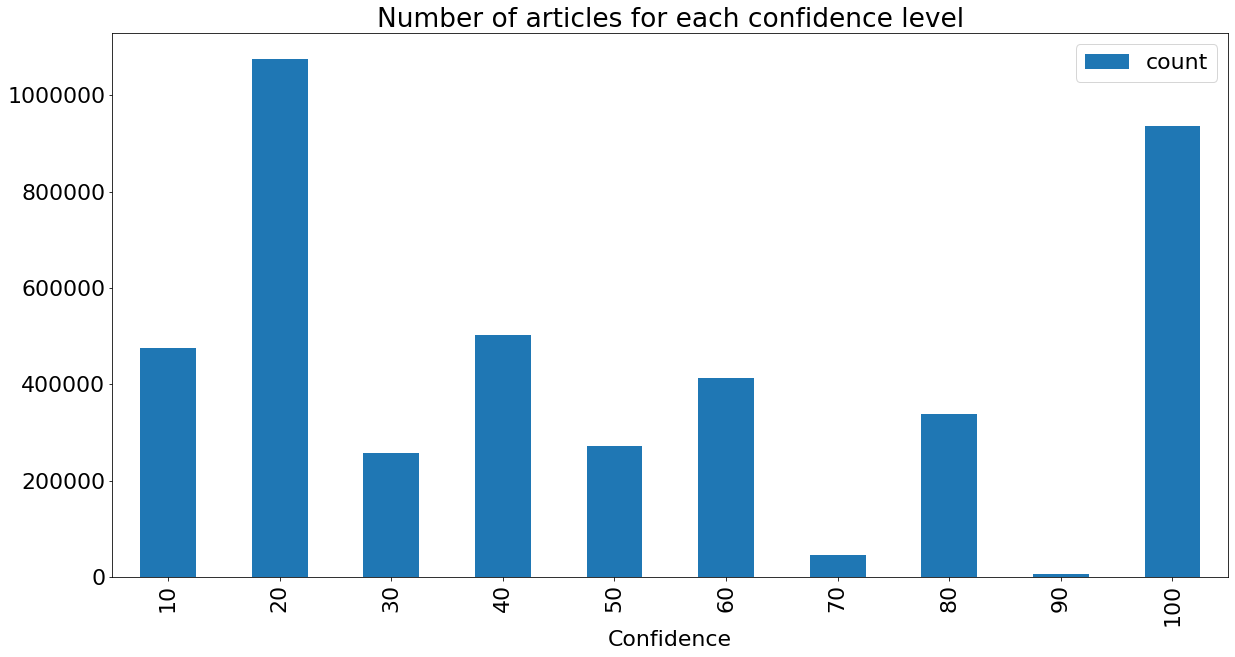

In [14]:
result_df.set_index('Confidence').plot.bar()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Number of articles for each confidence level')

Text(0.5, 1.0, 'Density plot of number of articles for each confidence level')

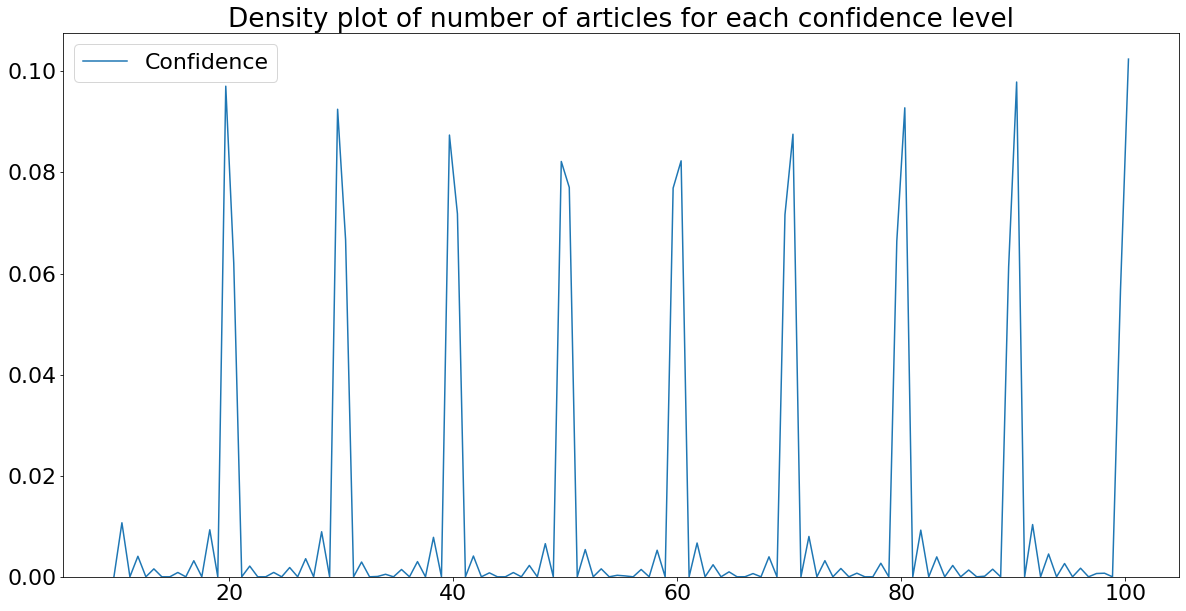

In [15]:
sns.kdeplot(result_df['Confidence'], bw=0.1)
plt.title('Density plot of number of articles for each confidence level')

### This is the confidence levels normalized

In [16]:
temp = df['Confidence'].sort_values(ascending=False).value_counts(normalize=True).sort_index()
temp.sort_index().round(decimals=2)

10     0.11
20     0.25
30     0.06
40     0.12
50     0.06
60     0.10
70     0.01
80     0.08
90     0.00
100    0.22
Name: Confidence, dtype: float64

Text(0.5, 1.0, 'Number of articles for each confidence level normalized')

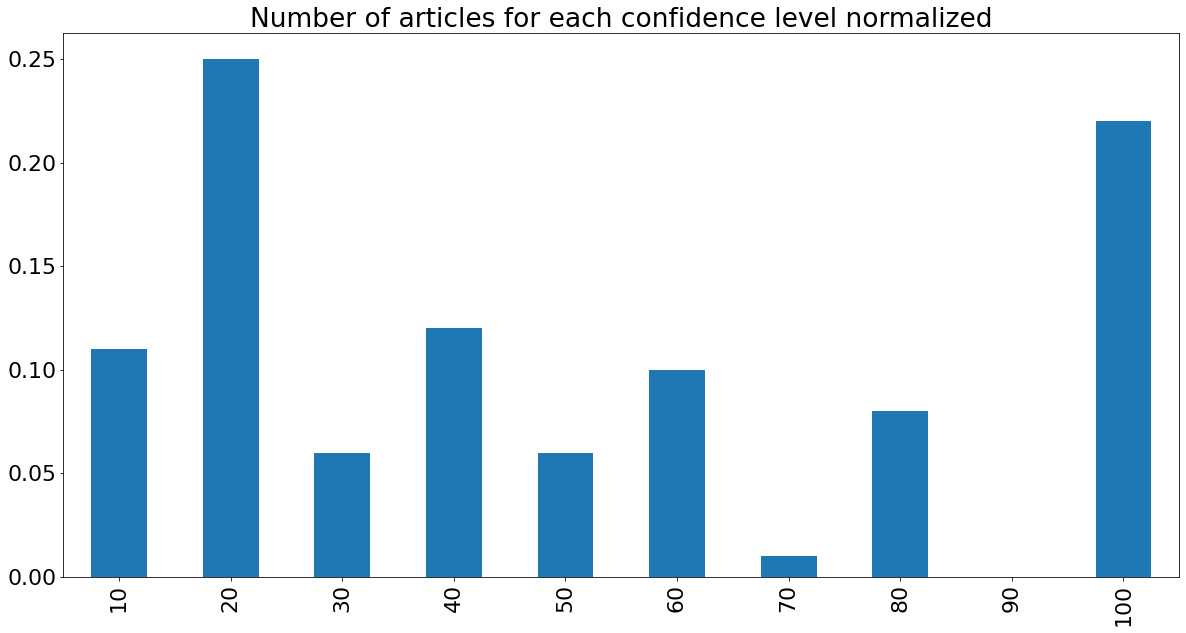

In [17]:
temp.sort_index().round(decimals=2).plot.bar()
plt.title('Number of articles for each confidence level normalized')

### Whats the average confidence levels?

In [18]:
df['Confidence'].describe().round(decimals=2)

count    4320359.00
mean          50.18
std           32.62
min           10.00
25%           20.00
50%           40.00
75%           80.00
max          100.00
Name: Confidence, dtype: float64

Text(0.5, 1.0, 'Pie plot showing all the condfidence levels in the dataframe')

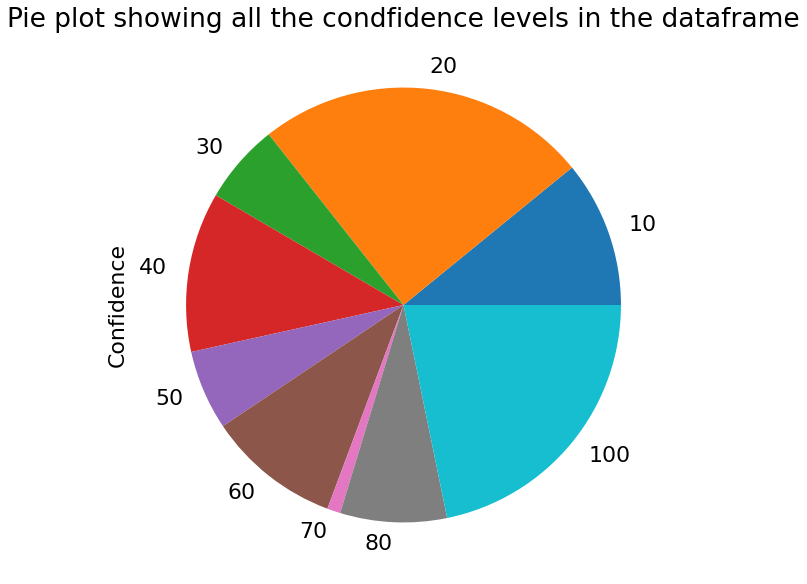

In [19]:
temp.sort_index().round(decimals=2).plot.pie()
plt.title('Pie plot showing all the condfidence levels in the dataframe')

# Lets start investigating Actor1CharOffset, Actor2CharOffset, and ActionCharOffset

## What are the average Actor1CharOffset, Actor2CharOffset, and ActionCharOffset?

In [20]:
df[['Actor1CharOffset','Actor2CharOffset','ActionCharOffset']].mean()

Actor1CharOffset    1687.455564
Actor2CharOffset    1365.165502
ActionCharOffset    1915.668193
dtype: float64

In [21]:
df[['Actor1CharOffset','Actor2CharOffset','ActionCharOffset']].describe().round(decimals=2)

,Actor1CharOffset,Actor2CharOffset,ActionCharOffset
count,4320359.00,4320359.00,4320359.00
mean,1687.46,1365.17,1915.67
std,3700.90,3097.30,4027.44
min,-1.00,-1.00,-1.00
25%,247.00,-1.00,518.00
50%,969.00,659.00,1241.00
75%,2193.00,1779.00,2457.00
max,465055.00,470405.00,470390.00


##### How many articles are there with a -1 offset?

In [22]:
query = """
SELECT count(*) as count
FROM events_eventmentions_gkg
WHERE (Actor1CharOffset = -1) OR (Actor2CharOffset = -1) OR (ActionCharOffset = -1)
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the result
result_df

,count
0,1681932


###### How many articles where the ActionCharOffset is -1?

In [23]:
query = """
SELECT count(*) as count
FROM events_eventmentions_gkg
WHERE (ActionCharOffset = -1)
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the result
result_df

,count
0,15073


###### How many articles where the Actor1CharOffset and Actor2CharOffset is -1?

In [24]:
query = """
SELECT count(*) as count
FROM events_eventmentions_gkg
WHERE (Actor1CharOffset = -1) OR (Actor2CharOffset = -1)
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
result_df = pd.DataFrame(data=temp1, columns=['count'])
# Convert the datatypes from Object 
result_df = result_df.convert_dtypes()
# Show the result
result_df

,count
0,1676209


### Look to find out if a -1 offset means missing actors?

This dataframe shows us where the Actor1CharOffset = -1

In [34]:
df[['Actor1Name','Actor1Geo_FullName','Actor2Name','Actor2Geo_FullName','ActionGeo_FullName','Actor1CharOffset','Actor2CharOffset','ActionCharOffset']][df['Actor1CharOffset'] == -1].head(5)

,Actor1Name,Actor1Geo_FullName,Actor2Name,Actor2Geo_FullName,ActionGeo_FullName,Actor1CharOffset,Actor2CharOffset,ActionCharOffset
0,<NA>,<NA>,VILLAGE,"Haatafu Beach, Tongatapu, Tonga","Haatafu Beach, Tongatapu, Tonga",-1,329,408
3,<NA>,<NA>,MURRAY,"Adamstown, , Pitcairn Islands","Adamstown, , Pitcairn Islands",-1,915,956
6,<NA>,<NA>,NIUE,Niue,Niue,-1,164,154
14,<NA>,<NA>,GOVERNMENT,"Canberra, Australian Capital Territory, Australia","Isurava, Northern, Papua New Guinea",-1,1450,1411
28,<NA>,<NA>,SURGEON,French Polynesia,French Polynesia,-1,202,236


This dataframe shows us where the Actor2CharOffset = -1

In [35]:
df[['Actor1Name','Actor1Geo_FullName','Actor2Name','Actor2Geo_FullName','ActionGeo_FullName','Actor1CharOffset','Actor2CharOffset','ActionCharOffset']][df['Actor2CharOffset'] == -1].head(5)

,Actor1Name,Actor1Geo_FullName,Actor2Name,Actor2Geo_FullName,ActionGeo_FullName,Actor1CharOffset,Actor2CharOffset,ActionCharOffset
1,WORLD BANK,"Haapai, Ha‘apai, Tonga",<NA>,<NA>,"Haapai, Ha‘apai, Tonga",508,-1,528
4,UNITED NATIONS,"Bali, East Sepik, Papua New Guinea",<NA>,<NA>,"Bali, East Sepik, Papua New Guinea",2593,-1,2544
7,TONGAN,"Vavau, Vava‘u, Tonga",KINGDOM,China,"Vavau, Vava‘u, Tonga",51,-1,83
8,DELEGATE,"Cincinnati, Ohio, United States",<NA>,<NA>,Northern Mariana Islands,14833,-1,14809
9,TONGA,"Tongatapu, Tongatapu, Tonga",<NA>,<NA>,"Tongatapu, Tongatapu, Tonga",890,-1,859


This dataframe shows us where the ActionCharOffset = -1

In [36]:
df[['Actor1Name','Actor1Geo_FullName','Actor2Name','Actor2Geo_FullName','ActionGeo_FullName','Actor1CharOffset','Actor2CharOffset','ActionCharOffset']][df['ActionCharOffset'] == -1].head(5)

,Actor1Name,Actor1Geo_FullName,Actor2Name,Actor2Geo_FullName,ActionGeo_FullName,Actor1CharOffset,Actor2CharOffset,ActionCharOffset
514,NIGERIA,"Adamstown, , Pitcairn Islands",SERVICEMEN,"Adamstown, , Pitcairn Islands","Adamstown, , Pitcairn Islands",477,612,-1
538,POLICE,"Merauke, Papua, Indonesia",INDONESIA,"Dewa, Jawa Timur, Indonesia","Sorong, Irian Jaya Barat, Indonesia",1851,2007,-1
555,LEGISLATURE,"Fakfak, Irian Jaya Barat, Indonesia",<NA>,<NA>,"Fakfak, Irian Jaya Barat, Indonesia",1093,-1,-1
945,<NA>,<NA>,COOK ISLANDS,"Maeva, Cook Islands (general), Cook Islands","Maeva, Cook Islands (general), Cook Islands",-1,130,-1
1177,PAPUA NEW GUINEA,"Kokoda, Northern, Papua New Guinea",NEWSPAPER,"Kokoda, Northern, Papua New Guinea","Kokoda, Northern, Papua New Guinea",786,825,-1


###### What is important to notice is that the even though the charOffsets are missing, the actors still appear in the dataset

# Look into NumSources

In [37]:
df['NumSources'].describe().round(decimals=2)

count    4320359.00
mean           1.69
std            2.46
min            1.00
25%            1.00
50%            1.00
75%            1.00
max           64.00
Name: NumSources, dtype: float64

Text(0, 0.5, 'count')

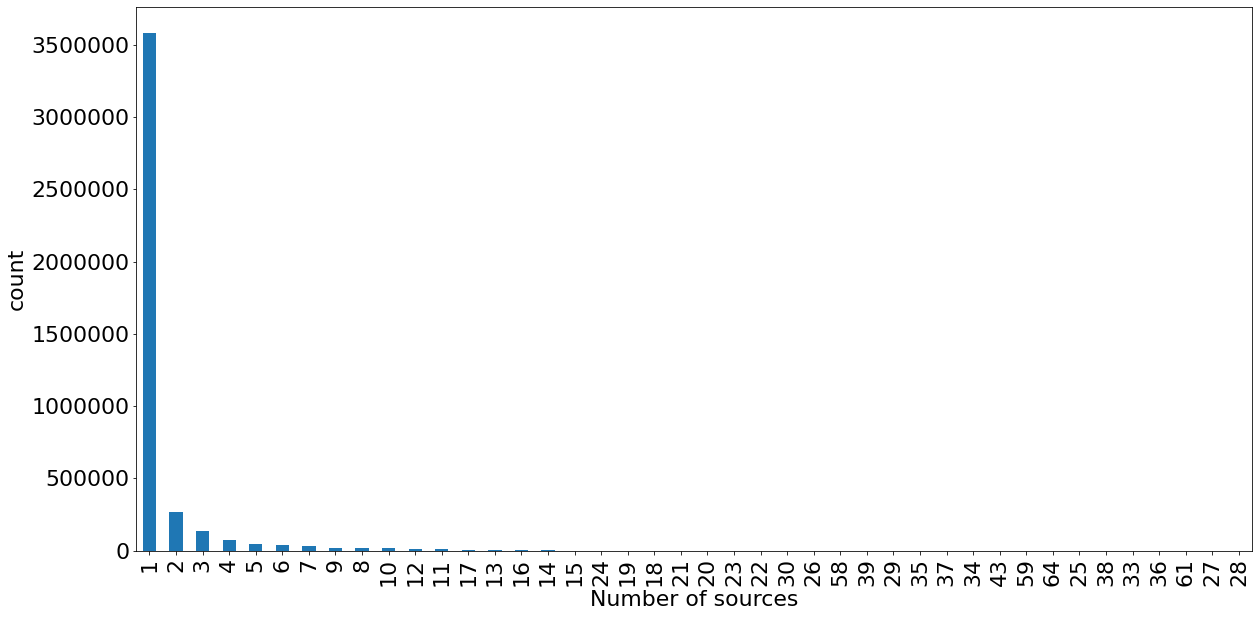

In [41]:
df['NumSources'].value_counts().plot.bar()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Number of sources")
plt.ylabel("count")

Because the vast majority of numSources is 1, i don't think we can use it as a proxy for trash articles

# Look into NumMentions

In [42]:
df['NumMentions'].describe().round(decimals=2)

count    4320359.00
mean           8.91
std           16.20
min            1.00
25%            2.00
50%            5.00
75%           10.00
max          640.00
Name: NumMentions, dtype: float64

In [51]:
df['NumMentions'].value_counts().head(30)

2     895128
10    762492
4     491823
6     403256
1     351010
8     324581
5     229687
3     212199
20    112029
12     64643
16     57862
7      47607
30     38989
24     33069
18     27807
14     25058
40     20860
9      18738
15     14784
50     12889
48      9927
70      9909
32      9043
28      9010
60      8245
36      6854
11      5807
42      5791
88      5702
26      5159
Name: NumMentions, dtype: Int64

In [ ]:
df['NumMentions'].plot.bar()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Number of mentions")
plt.ylabel("count")

Text(0, 0.5, 'count')

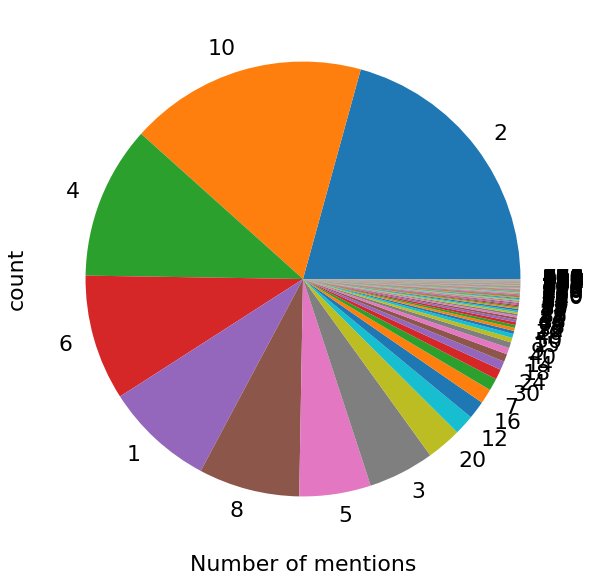

In [50]:
df['NumMentions'].value_counts().plot.pie()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Number of mentions")
plt.ylabel("count")

It looks like the majority of articles have anywhere between 2 and 10 articles associated with it

# Look into numArticles

In [54]:
df['NumArticles'].describe().round(decimals=2)

count    4320359.00
mean           8.75
std           15.94
min            1.00
25%            2.00
50%            5.00
75%           10.00
max          640.00
Name: NumArticles, dtype: float64

<AxesSubplot:>

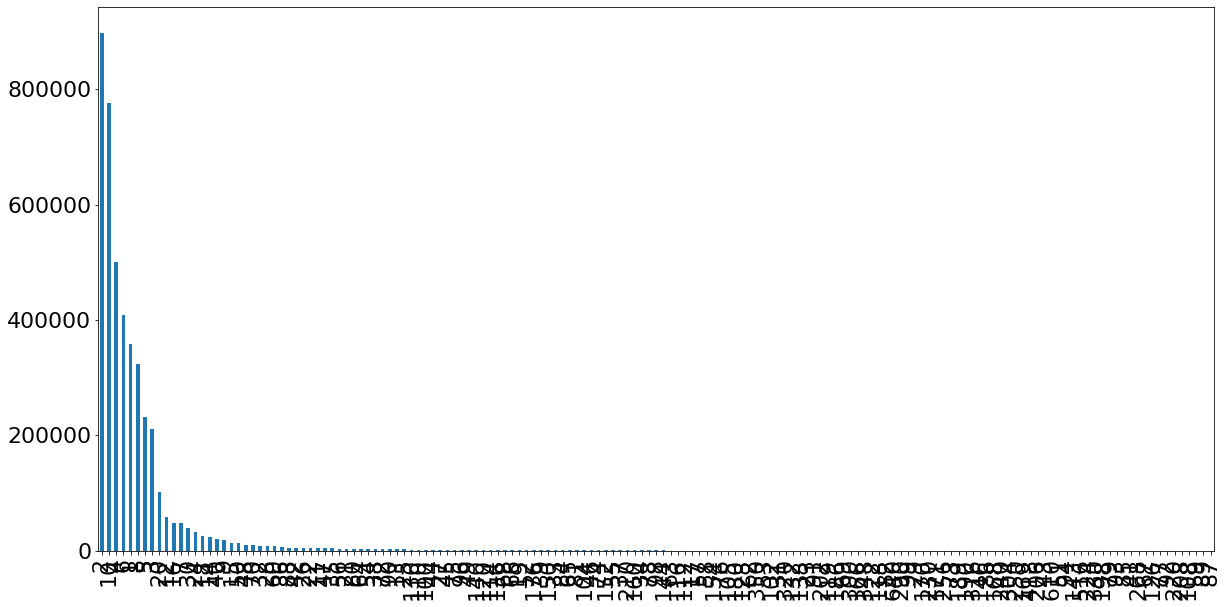

In [56]:
df['NumArticles'].value_counts().plot.bar()

<AxesSubplot:ylabel='NumArticles'>

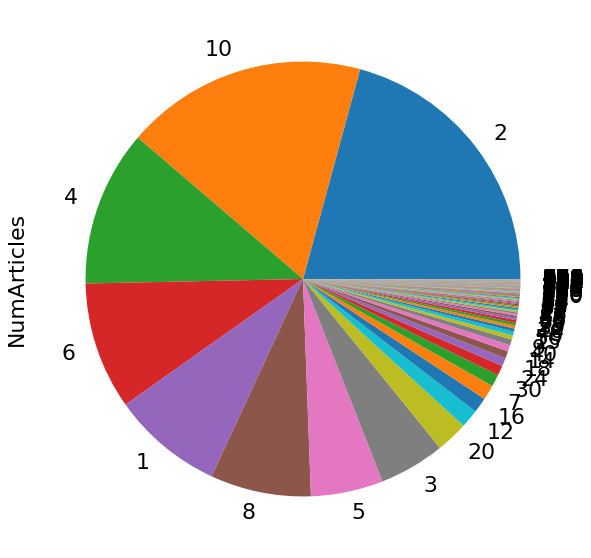

In [57]:
df['NumArticles'].value_counts().plot.pie()

Both the NumMentions and NumArticles looks really similar

In [59]:
df[['NumArticles','NumMentions']].corr()

,NumArticles,NumMentions
NumArticles,1.000000,0.992633
NumMentions,0.992633,1.000000


They do have a very positive correlation